<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Testing-with-Chat-GPT" data-toc-modified-id="Testing-with-Chat-GPT-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Testing with Chat-GPT</a></span></li></ul></div>

## Testing with Chat-GPT

Chat-GPT prompt:

I have a CSV file named 'data/tr_eikon_eod_data.csv' which contains a column called '.SPX'. This is a time series with daily closing prices of the S&P 500 starting from oldest at the top (in 2010) and youngest at the bottom (2018). Please produce Python code that creates a column with log returns of the closing prices as well as 252-day volatility of the S&P 500 returns. Please plot both the S&P 500 closing prices and the volatility.

The code below is a good start, but doesn't produce the desired plot. 

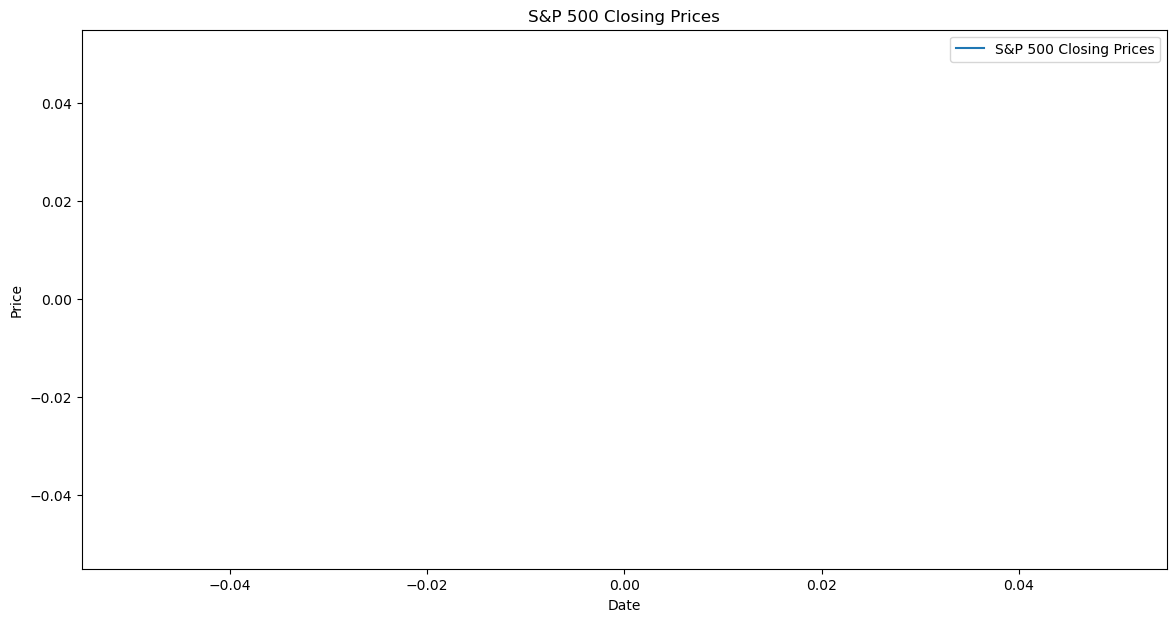

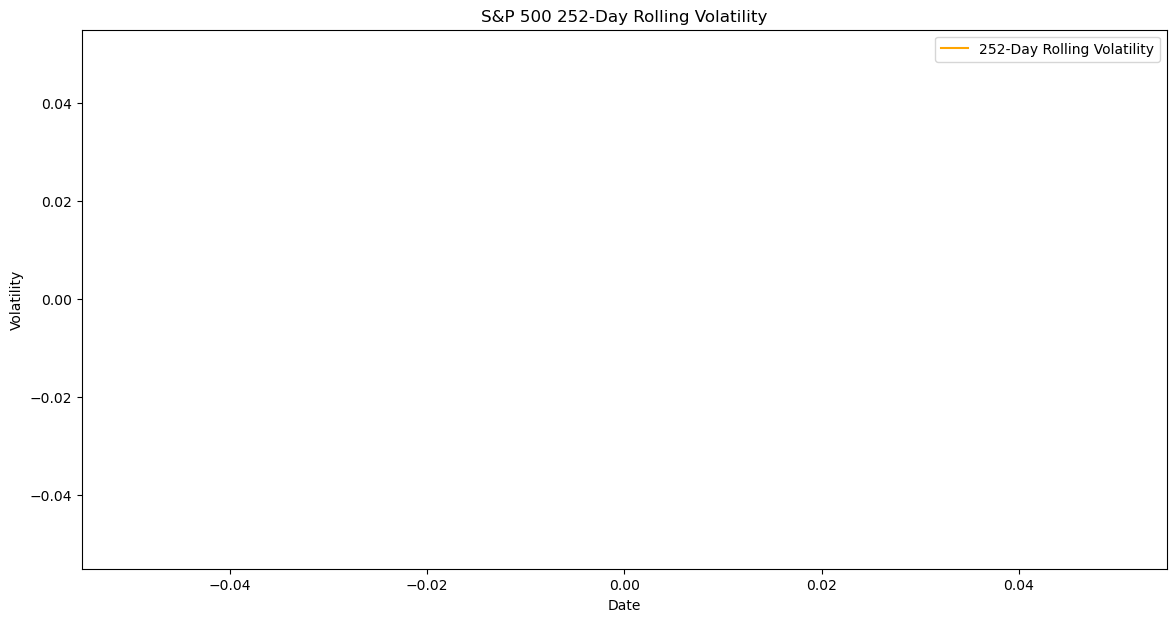

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'data/tr_eikon_eod_data.csv'
data = pd.read_csv(file_path)

# Ensure the data is sorted by date (if necessary) and reset index
data.sort_index(inplace=True)

# Calculate log returns
data['Log_Returns'] = np.log(data['.SPX'] / data['.SPX'].shift(1))

# Calculate 252-day rolling volatility
data['Volatility'] = data['Log_Returns'].rolling(window=252).std() * np.sqrt(252)

# Drop NA values generated during calculation
data.dropna(inplace=True)

# Plot the S&P 500 closing prices
plt.figure(figsize=(14, 7))
plt.plot(data['.SPX'], label='S&P 500 Closing Prices')
plt.title('S&P 500 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the 252-day rolling volatility
plt.figure(figsize=(14, 7))
plt.plot(data['Volatility'], label='252-Day Rolling Volatility', color='orange')
plt.title('S&P 500 252-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


So, let's look at the code step-by-step and fix it.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'data/tr_eikon_eod_data.csv'
data = pd.read_csv(file_path)

In [27]:
data.head()

,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
1,2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2,2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
3,2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
4,2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [28]:
# Ensure the data is sorted by date (if necessary) and reset index
data.sort_index(inplace=True)

data.head()

,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
1,2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2,2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
3,2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
4,2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [29]:
# Calculate log returns
data['Log_Returns'] = np.log(data['.SPX'] / data['.SPX'].shift(1))

data.head()

,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD,Log_Returns
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN,NaN
1,2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80,NaN
2,2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70,0.003111
3,2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51,0.000545
4,2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82,0.003993


In [30]:
# Calculate 252-day rolling volatility
data['Volatility'] = data['Log_Returns'].rolling(window=252).std() * np.sqrt(252)
data.head()

,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD,Log_Returns,Volatility
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN,NaN,NaN
1,2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80,NaN,NaN
2,2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70,0.003111,NaN
3,2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51,0.000545,NaN
4,2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82,0.003993,NaN


We see above that the volatility was not calculated properly; the `dropna` call to remove missing values needs to be called before. So let's start over...

In [31]:
# Load the CSV file
file_path = 'data/tr_eikon_eod_data.csv'
data = pd.read_csv(file_path)

# Ensure the data is sorted by date (if necessary) and reset index
data.sort_index(inplace=True)

# Calculate log returns
data['Log_Returns'] = np.log(data['.SPX'] / data['.SPX'].shift(1))

### NEW 
# the line below was moved to before creating the volatility, not after
# Drop NA values generated during calculation
data.dropna(inplace=True)
### NEW

# Calculate 252-day rolling volatility
data['Volatility'] = data['Log_Returns'].rolling(window=252).std() * np.sqrt(252)
data.head()

,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD,Log_Returns,Volatility
2,2010-01-05,30.625684,30.960,20.87,134.690,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70,0.003111,NaN
3,2010-01-06,30.138541,30.770,20.80,132.250,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51,0.000545,NaN
4,2010-01-07,30.082827,30.452,20.60,130.000,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82,0.003993,NaN
5,2010-01-08,30.282827,30.660,20.83,133.520,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37,0.002878,NaN
6,2010-01-11,30.015684,30.270,20.95,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.60,50.17,112.85,0.001745,NaN


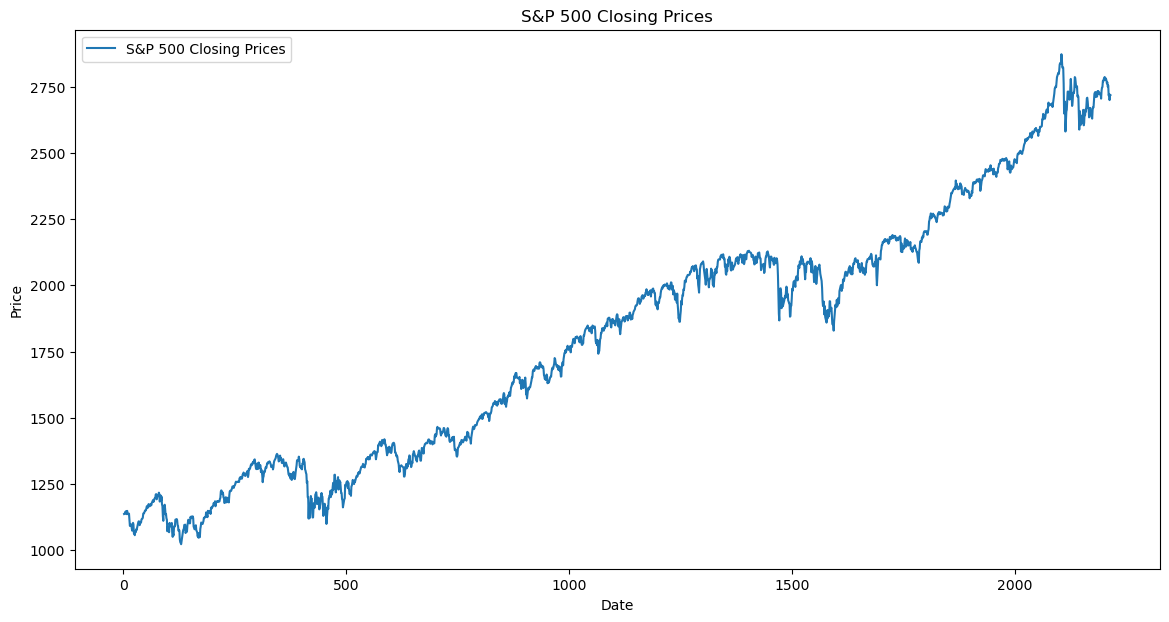

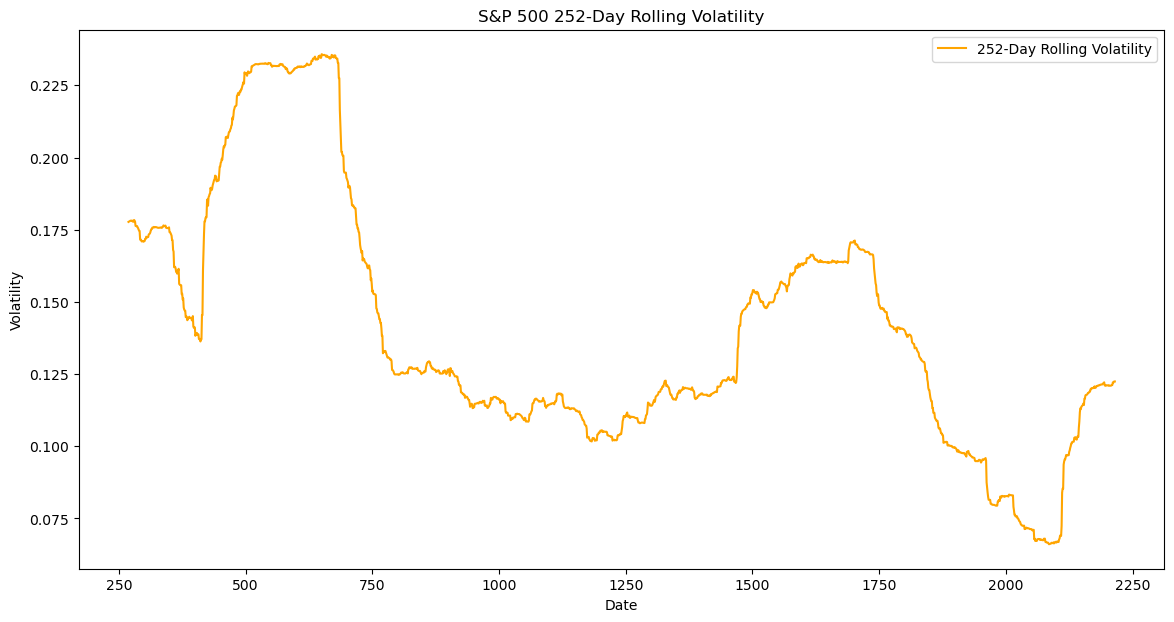

In [32]:
# Plot the S&P 500 closing prices
plt.figure(figsize=(14, 7))
plt.plot(data['.SPX'], label='S&P 500 Closing Prices')
plt.title('S&P 500 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the 252-day rolling volatility
plt.figure(figsize=(14, 7))
plt.plot(data['Volatility'], label='252-Day Rolling Volatility', color='orange')
plt.title('S&P 500 252-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [7]:
data.head()

,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD,Log_Returns,Volatility
